In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import shutil


In [20]:
IMAGE_SIZE = (128, 128)  # Resize all images to 128x128
DATASET_PATH = "D:\ARTIFICAL INTELLIGENCE\SEM 2\extra\gesturedata"  # Path where raw images are stored
PROCESSED_PATH = "D:\ARTIFICAL INTELLIGENCE\SEM 2\wavepointer\processed_data"  # Path to save processed images
PROCESSED = "D:\ARTIFICAL INTELLIGENCE\SEM 2\wavepointer\npyfiles"  # Path to save processed images


In [25]:
def load_images(dataset_path):
    images, labels = [], []  # Store image data and corresponding labels
    class_labels = os.listdir(dataset_path)  # Get gesture class names

    for label in class_labels:
        class_path = os.path.join(dataset_path, label)  # Path for each class folder
        if not os.path.isdir(class_path):  
            continue  # Skip files that are not folders
        
        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path)  # Read image
            if img is None:
                continue  # Skip corrupted images
            
            # Convert to grayscale (optional)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

            # Resize image
            img = cv2.resize(img, IMAGE_SIZE)

            # Normalize pixel values to range [0,1]
            img = img / 255.0

            images.append(img)
            labels.append(label)  # Store label (gesture name)

    return np.array(images), np.array(labels)


In [26]:
images, labels = load_images(DATASET_PATH)

print(f"Total Images Loaded: {len(images)}")
print(f"Unique Classes: {set(labels)}")  # Print gesture categories


Total Images Loaded: 20000
Unique Classes: {'09_c', '05_thumb', '08_palm_moved', '02_l', '10_down', '07_ok', '03_fist', '01_palm', '06_index', '04_fist_moved'}


In [27]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

print("Encoded Labels:", encoded_labels[:10])  # Display first 10 encoded labels


Encoded Labels: [0 0 0 0 0 0 0 0 0 0]


In [28]:
X_train, X_test, y_train, y_test = train_test_split(images, encoded_labels, 
                                                    test_size=0.2, random_state=42, stratify=encoded_labels)

print(f"Training Images: {len(X_train)}, Testing Images: {len(X_test)}")


Training Images: 16000, Testing Images: 4000


In [29]:
datagen = ImageDataGenerator(
    rotation_range=20,     # Randomly rotate images by 20 degrees
    width_shift_range=0.2, # Randomly shift images horizontally
    height_shift_range=0.2,# Randomly shift images vertically
    horizontal_flip=True   # Flip images horizontally
)




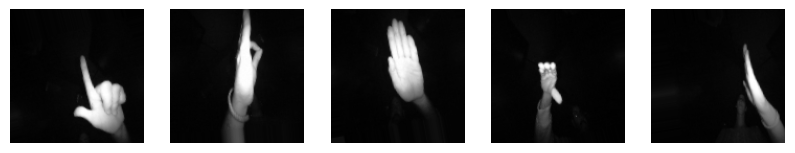

In [30]:
# Example: Display augmented images
fig, axes = plt.subplots(1, 5, figsize=(10, 5))

for i, ax in enumerate(axes):
    # Ensure the image has 4 dimensions: (1, height, width, channels)
    img = X_train[i]
    
    # Add batch and channel dimensions if missing
    if img.ndim == 2:  # Grayscale image (height, width)
        img = np.expand_dims(img, axis=0)  # Add batch dimension
        img = np.expand_dims(img, axis=-1)  # Add channel dimension (now shape: (1, H, W, 1))
    elif img.ndim == 3 and img.shape[-1] != 1:  # RGB image (H, W, 3)
        img = np.expand_dims(img, axis=0)  # Add batch dimension
    
    # Generate augmented image
    augmented_img = next(datagen.flow(img, batch_size=1))[0]
    
    # Squeeze the channel dimension for plotting (if grayscale)
    if augmented_img.shape[-1] == 1:
        augmented_img = augmented_img.squeeze(axis=-1)  # Shape becomes (H, W)
    
    ax.imshow(augmented_img, cmap='gray')
    ax.axis('off')

plt.show()

In [31]:
if not os.path.exists(PROCESSED_PATH):
    os.makedirs(PROCESSED_PATH)

# Save processed training images
for img, label in zip(X_train, y_train):
    class_folder = os.path.join(PROCESSED_PATH, label_encoder.inverse_transform([label])[0])
    os.makedirs(class_folder, exist_ok=True)
    img_path = os.path.join(class_folder, f"train_{np.random.randint(10000)}.png")
    cv2.imwrite(img_path, (img * 255).astype(np.uint8))  # Convert back to 0-255 before saving

# Save processed testing images
for img, label in zip(X_test, y_test):
    class_folder = os.path.join(PROCESSED_PATH, label_encoder.inverse_transform([label])[0])
    os.makedirs(class_folder, exist_ok=True)
    img_path = os.path.join(class_folder, f"test_{np.random.randint(10000)}.png")
    cv2.imwrite(img_path, (img * 255).astype(np.uint8))  # Convert back to 0-255 before saving

print(f"Processed data saved in: {PROCESSED_PATH}")


Processed data saved in: D:\ARTIFICAL INTELLIGENCE\SEM 2\wavepointer\processed_data


In [33]:
def save_data_for_cnn(X_train, y_train, X_test, y_test):
    """Save the processed images and labels into .npy files."""
    np.save(os.path.join(PROCESSED_PATH, 'X_train.npy'), X_train)
    np.save(os.path.join(PROCESSED_PATH, 'y_train.npy'), y_train)
    np.save(os.path.join(PROCESSED_PATH, 'X_test.npy'), X_test)
    np.save(os.path.join(PROCESSED_PATH, 'y_test.npy'), y_test)
    print("✅ .npy files for CNN training have been saved!")

# Save data to .npy files
save_data_for_cnn(X_train, y_train, X_test, y_test)


✅ .npy files for CNN training have been saved!
